### House Sales in King County, USA by Abhishek Rameshchand Singh



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Module 1: Importing Data Sets


In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Question 1

Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your code in the image.

In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Module 2: Data Wrangling

Question 2
Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True

In [10]:
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True) #dropping columns "id" and "Unnamed: 0" from axis 1 

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns  bedrooms and  bathrooms 


In [15]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). Don't forget to set the inplace parameter to True


In [16]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). Don't forget to set the  inplace  parameter top  True 


In [17]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [18]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Module 3: Exploratory Data Analysis

Question 3
Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.

In [21]:
df['floors'].value_counts() # counting number of houses with unique floor values

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [22]:
df['floors'].value_counts().to_frame() #converting to a dataframe

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Question 4


Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.


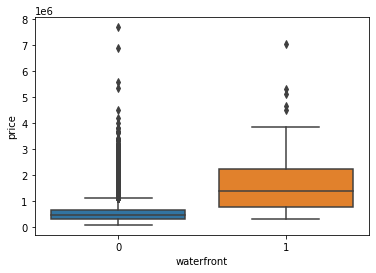

In [23]:
sns.boxplot(x='waterfront', y='price',data=df)

Question 5


Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

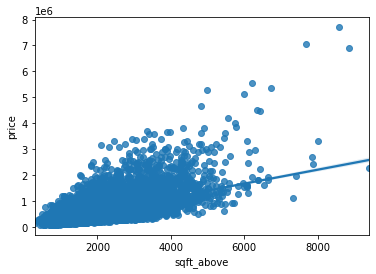

In [26]:
sns.regplot(x='sqft_above',y='price',data=df)

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.


In [27]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,-0.126197,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.026690,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356589,0.664676,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


Module 4: Model Development


We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [28]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Question 6


Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [32]:
lm = LinearRegression()
lm
X = df[['sqft_living']]
Y = df['price']
lm.fit(X,Y)
lm.score(X,Y)



0.49285321790379316

In [33]:
y_data = df['price']
x_data=df.drop('price',axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre=LinearRegression()

lre.fit(x_train[['sqft_living']], y_train)
lre.score(x_test[['sqft_living']], y_test)


number of test samples : 3242
number of training samples: 18371


0.4910058627910613

Question 7


Fit a linear regression model to predict the 'price' using the list of features:

In [34]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [35]:
lm = LinearRegression()
lm

X = df[['floors']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)

0.06594310068341092

In [36]:

lm = LinearRegression()
lm

X = df[['waterfront']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)


0.07095267538578309

In [37]:
lm = LinearRegression()
lm

X = df[['lat']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)



0.09425113672917462

In [38]:
lm = LinearRegression()
lm

X = df[['bedrooms']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)


0.09535546506131365

In [39]:
lm = LinearRegression()
lm

X = df[['sqft_basement']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)


0.104856815269744

In [40]:
lm = LinearRegression()
lm

X = df[['view']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)



0.15784211584121532

In [41]:
lm = LinearRegression()
lm

X = df[['bathrooms']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)

0.27639993060314383

In [42]:
lm = LinearRegression()
lm

X = df[['sqft_living15']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)


0.3426684607560172

In [43]:
lm = LinearRegression()
lm

X = df[['sqft_above']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)


0.36671175283827917

In [44]:
lm = LinearRegression()
lm

X = df[['grade']]
Y = df['price']

lm.fit(X,Y)

lm.score(X,Y)


0.4454684861092873

In [45]:
lm = LinearRegression()
lm

X = df[['sqft_living']]
Y = df['price']

lm.fit(X,Y)
lm.score(X,Y)


0.49285321790379316

Then calculate the R^2. Take a screenshot of your code.


In [47]:
X = df[features]
y = df.price
lm = LinearRegression()
lm.fit(X, y)
lm.score(X, y)

0.6576565253474225

This will help with Question 8


Create a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [48]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Question 8


Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [50]:
X = df[features]
y = df.price
pipe = Pipeline(Input)
pipe.fit(X, y)
pipe.score(X, y)

0.7513410480451947

Module 5: Model Evaluation and Refinement


Import the necessary modules:

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [52]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Question 9


Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [53]:
from sklearn.linear_model import Ridge

In [54]:
rm = Ridge(alpha=0.1)
rm.fit(x_train, y_train)
rm.score(x_test, y_test)

0.6478759163939117

Question 10


Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [55]:
pr = PolynomialFeatures(degree = 2)
X_train_pr = pr.fit_transform(x_train)
X_test_pr = pr.fit_transform(x_test)

rr = Ridge(alpha = 0.1)
rr.fit(X_train_pr, y_train)
rr.score(X_test_pr, y_test)

0.7002744277220405